In [1]:
from ground_roll import ground_roll

In [2]:
gr = ground_roll()

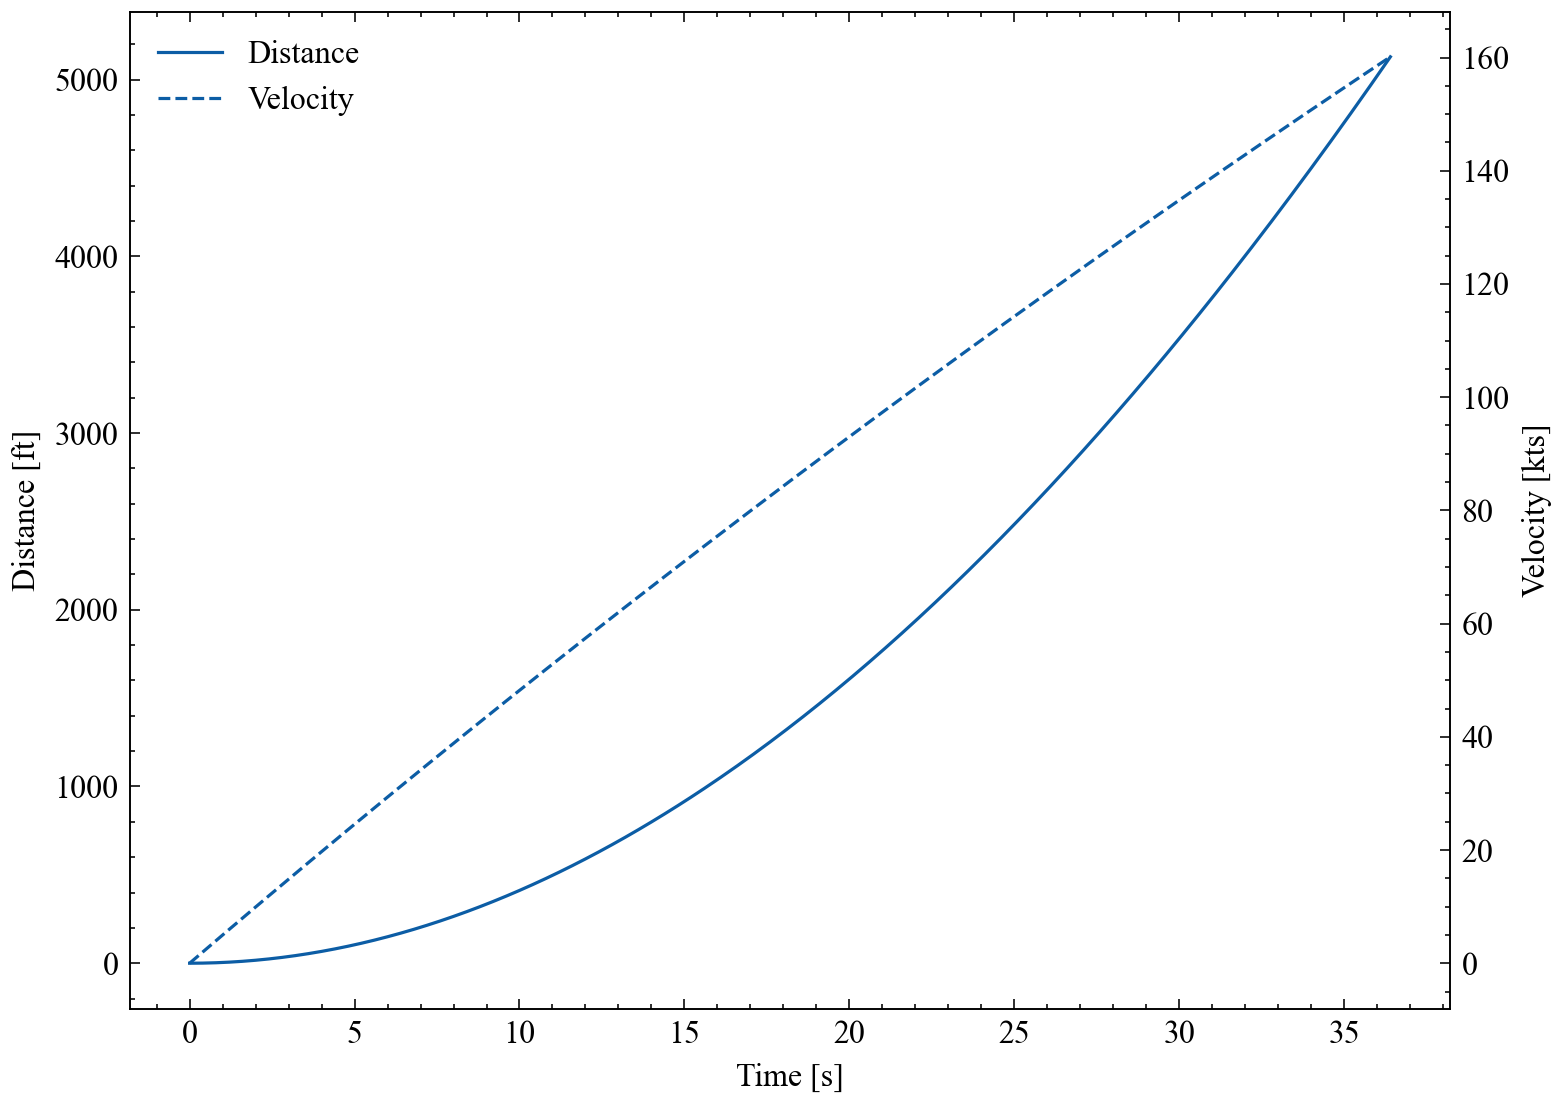

Final time:  36.4  s
Final distance:  5128.76  ft


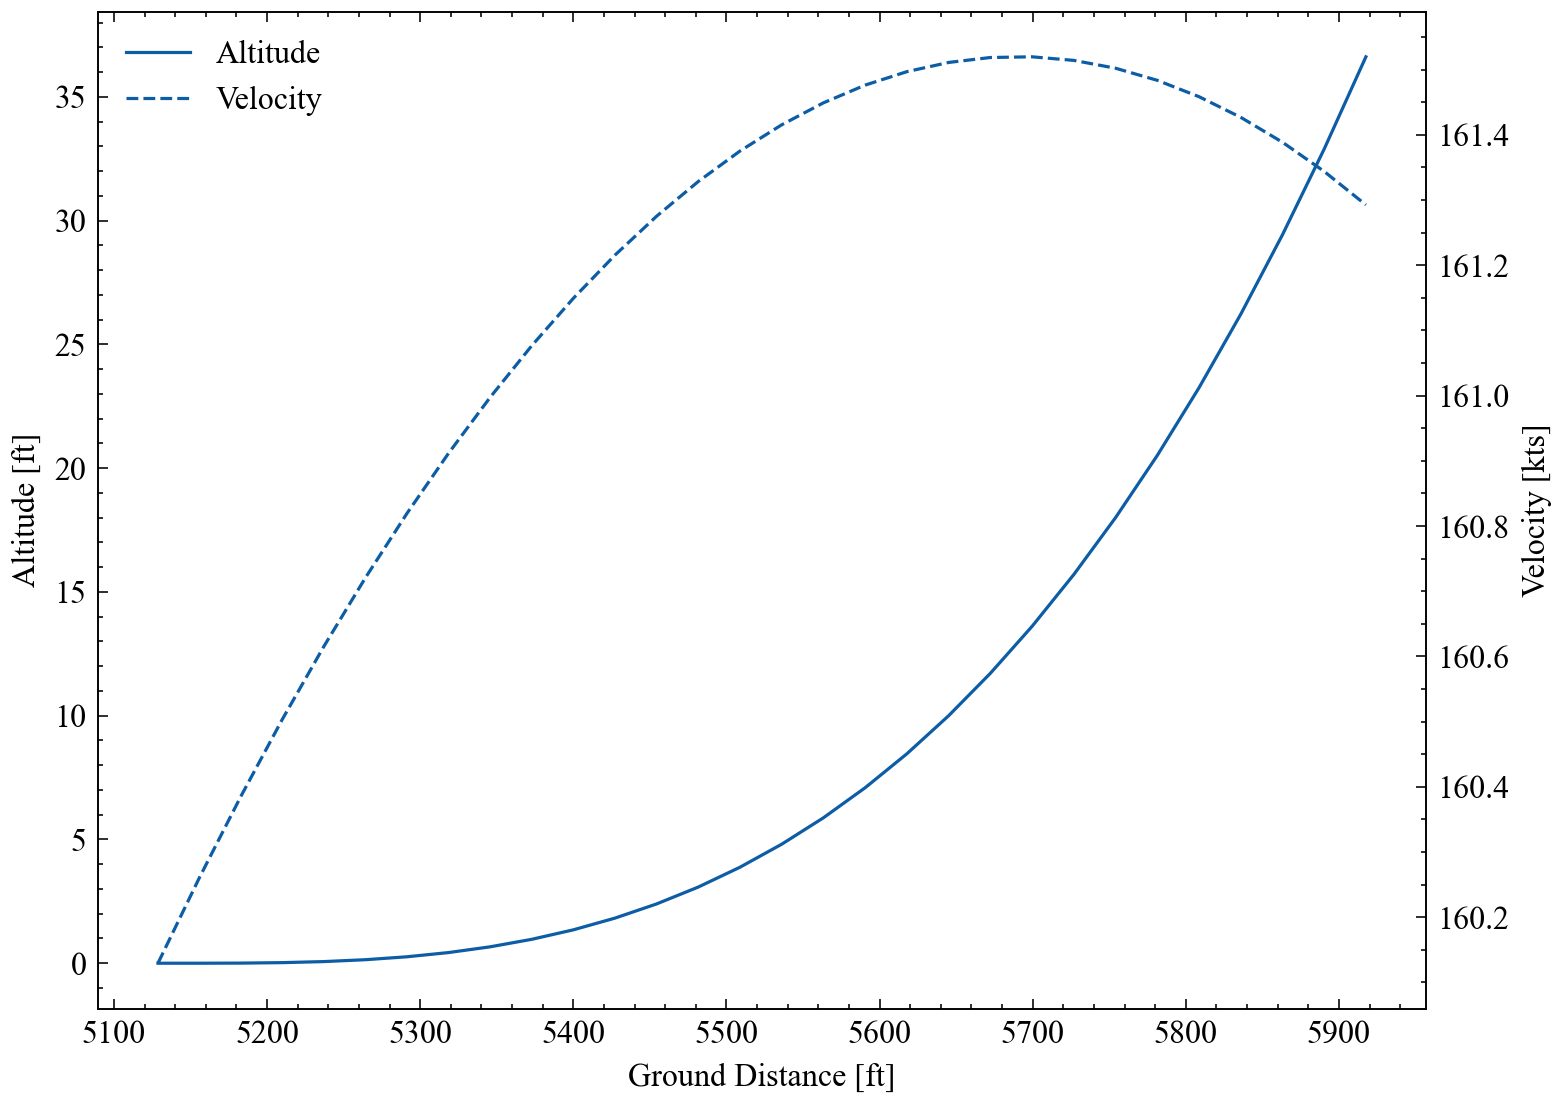

Final velocity:  161.29  kts
Final distance:  5917.62  ft


In [3]:
gr.no_wind()

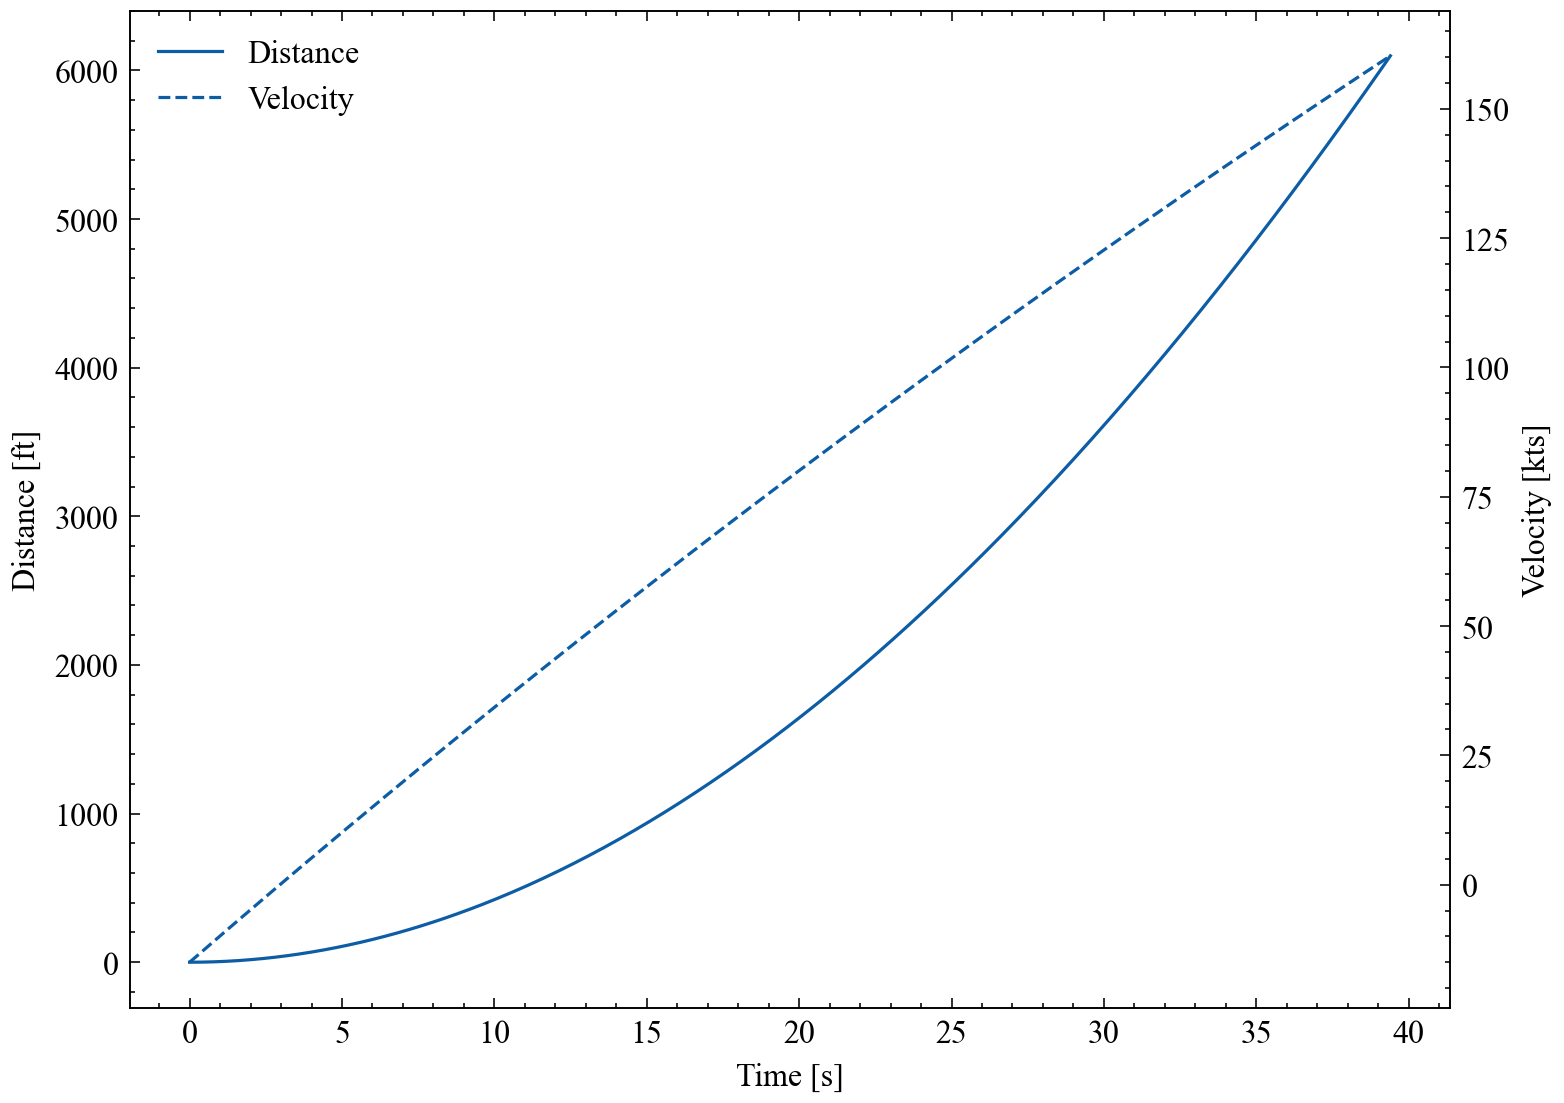

Final time:  39.4  s
Final distance:  6098.15  ft


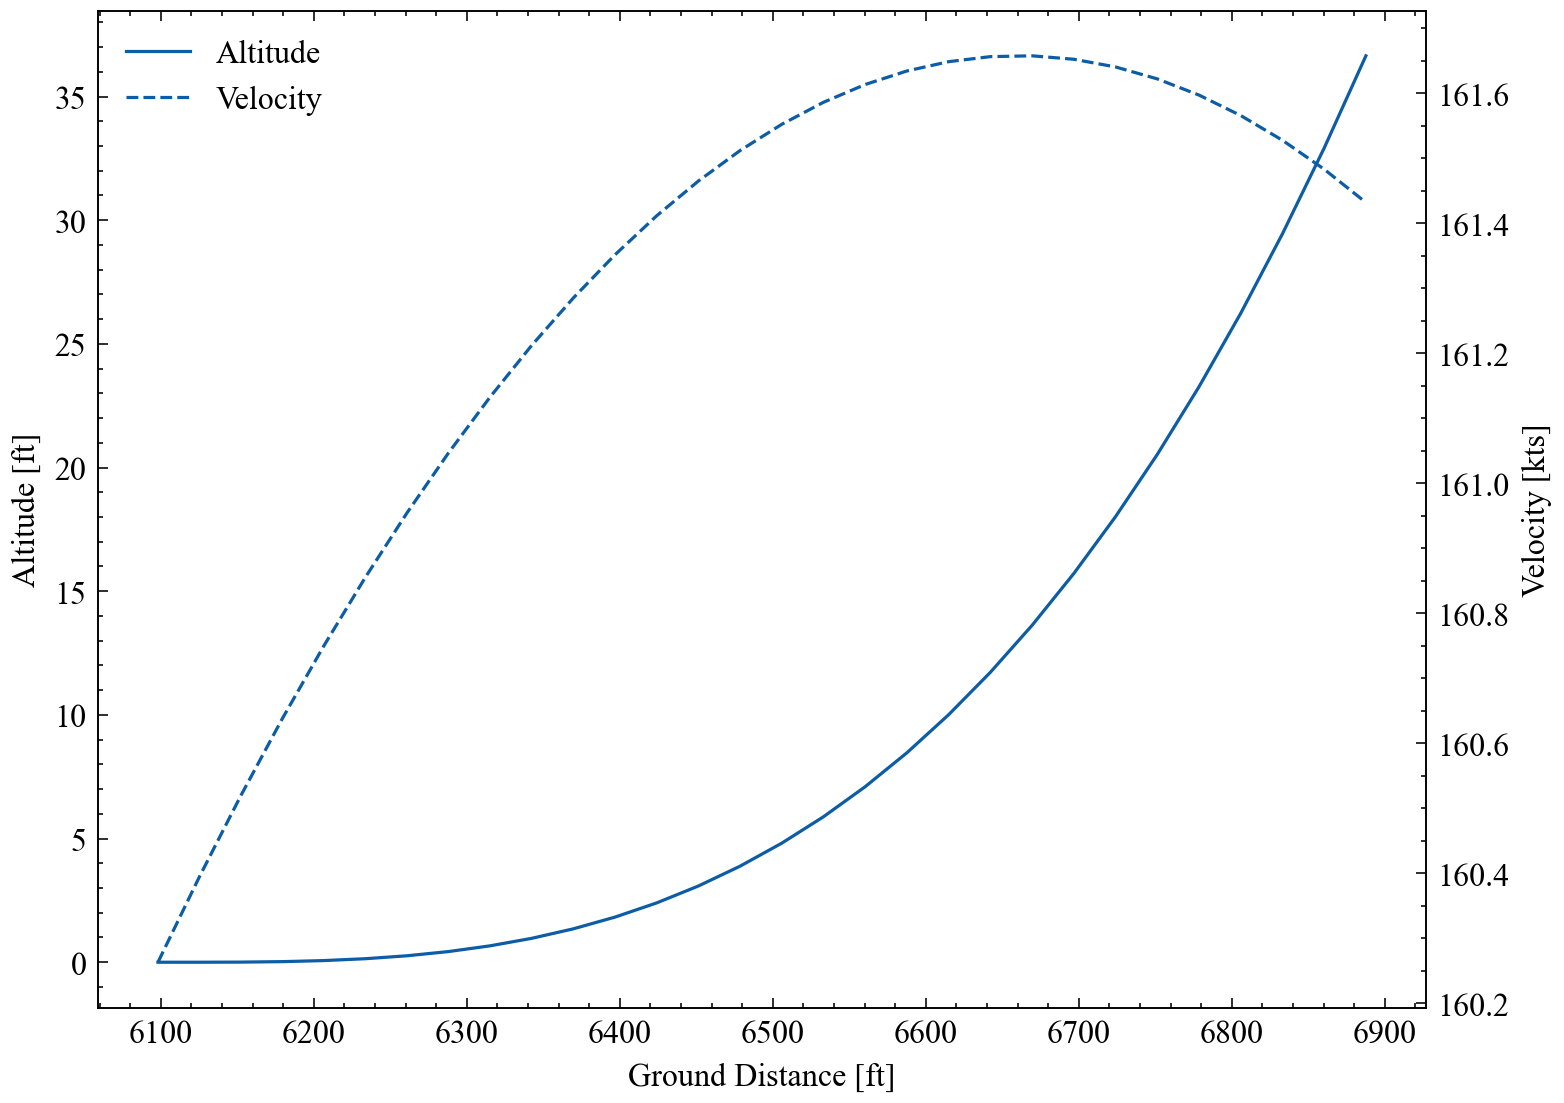

Final velocity:  161.43  kts
Final distance:  6887.67  ft


In [4]:
gr.wind()

In [5]:
print('Analytical approximation: ', gr.analytical_approx()*3.28084, ' ft')
print('Numerical integration:', gr.gr_distance[-1]*3.28084, ' ft')

Analytical approximation:  5465.192386290925  ft
Numerical integration: 5128.757595860957  ft


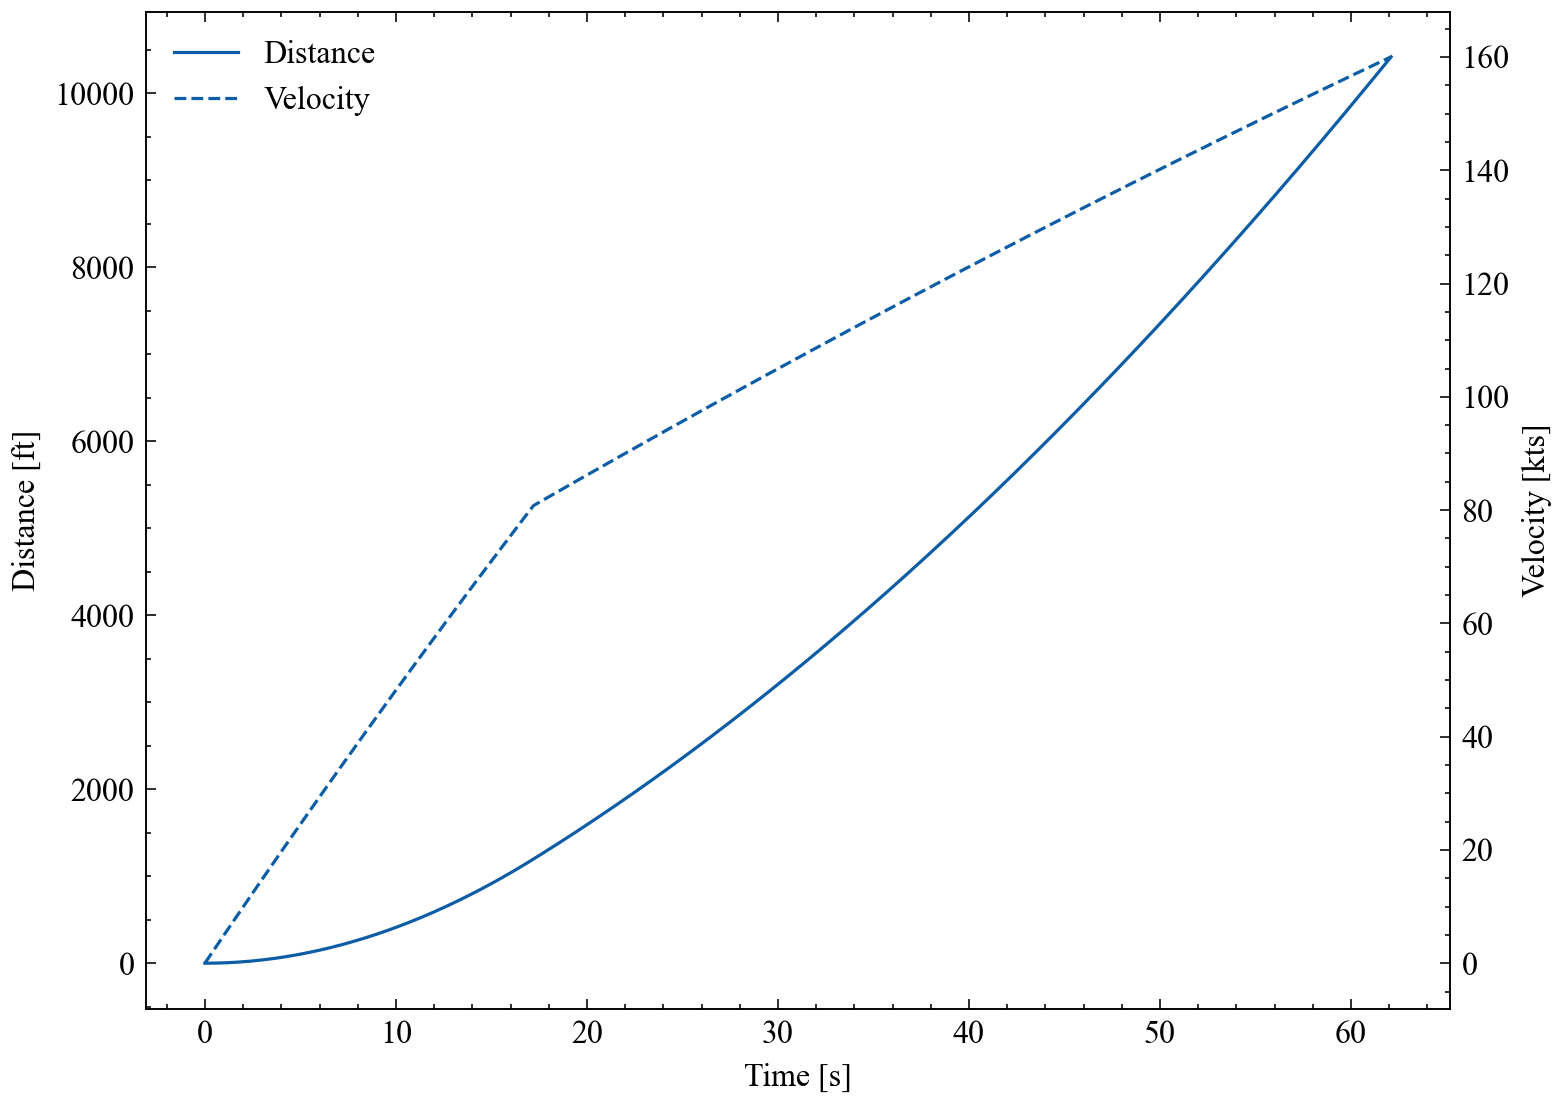

Final time:  62.1  s
Final distance:  10420.01  ft


In [6]:
gr.engine_loss()

In [7]:
#force_o = self.thrust(0) - self.ground_cf * self.takeoff_weight
#force_lof = self.thrust(self.transition_velocity) - self.drag(self.transition_velocity, 0) - self.ground_cf * (self.takeoff_weight - 0.5 * 1.225 * np.power(self.transition_velocity, 2) * self.wing_area * self.ground_cl)

#ground_distance = (self.takeoff_weight / 2*9.81) * (np.power(self.transition_velocity, 2))/(force_o - force_lof) * np.log((force_o / force_lof))

In [8]:
%pylab inline
import handcalcs.render

Populating the interactive namespace from numpy and matplotlib


In [9]:
transition_velocity = gr.transition_velocity
takeoff_weight = gr.takeoff_weight
ground_cf = gr.ground_cf
wing_area = gr.wing_area
ground_cd = gr.ground_cd
ground_cl = gr.ground_cl

In [10]:
%%render
thrust = gr.thrust(0)

force_o = thrust - ground_cf * takeoff_weight

<IPython.core.display.Latex object>

In [11]:
%%render
drag = 0.5 * 1.225 * transition_velocity**2 * wing_area * ground_cd
lift = 0.5 * 1.225 * transition_velocity**2 * wing_area * ground_cl

thrust = gr.thrust(transition_velocity)

force_lof = thrust - drag - ground_cf * (takeoff_weight - lift)

<IPython.core.display.Latex object>

In [ ]:
%%render
transition_velocity = gr.transition_velocity
ground_distance = (takeoff_weight / (2*9.81)) * (transition_velocity**2)/(force_o - force_lof) * np.log((force_o / force_lof))